In [6]:
from glob import glob
import numpy as np
from astropy.table import QTable, vstack
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.interpolate import interp1d

plt.style.use('paper')

In [7]:
def custom_sort(arr):
    def key_func(item):
        # Extract number from string and convert to integer
        num = int(item[4:])  # 'conf' has length 4
        # Return a tuple with two items:
        # First item is a boolean indicating if number is 10 (True for 'conf10' and False otherwise)
        # Second item is the number itself
        # This will sort 'conf10' last and others based on their numbers
        return (num == 10, num)
    
    return sorted(arr, key=key_func)

In [8]:
which = 'disks'
version = '_disks_v1'
# version = '_v2'

# which_time = ''
which_time = '_6totaltime'
which_time = '_6totaltime_flagged'
# which_time = '_60totaltime'
# which_time = '_60totaltime_flagged'

table = vstack([QTable.read(file) for file in glob(f'../data/tables{version}/table_fit_{which}{which_time}_conf*.fits')])
conf_unique = np.unique(table['conf']) 
conf_unique =  custom_sort(conf_unique)
conf_unique_ = np.unique(table['conf_']) 

beam_size = np.array([3.38, 2.3, 1.42, 0.918, 0.545, 0.306, 0.211, 0.096, 0.057, 0.042])
mrs_size = np.array([28.5, 22.6, 16.2, 11.2, 6.7, 4.11, 2.58, 1.42, 0.814, 0.496])
mrs_conf = np.arange(1,11)

table.sort('conf')
table

conf,wide,sum_sim,sum_obs,rms_obs,max_sim,max_obs,sum_fit_sim,sum_fit_obs,errl_fit_sim,errh_fit_sim,errl_fit_obs,errh_fit_obs,sum_mask10_sim,sum_mask10_obs,sum_mask50_sim,sum_mask50_obs,conf_,wide_
,,Jy,Jy,Jy,Jy,Jy,,,,,,,Jy,Jy,Jy,Jy,,
bytes6,bytes8,float32,float32,float64,float32,float32,bytes1,bytes1,bytes1,bytes1,bytes1,bytes1,float32,float32,float32,float32,float64,float64
conf1,2.9mrs0,25.0,25.284469604492188,0.00013704703652785204,1.0,0.717534065246582,,,,,,,25.0,22.962919235229492,25.0,13.323237419128418,1.0,2.9
conf1,42.8mrs0,6149.0,1936.9681396484375,0.018463702982754612,1.0,1.1635003089904785,,,,,,,6149.0,1792.48681640625,6149.0,1721.79248046875,1.0,42.8
conf1,39.9mrs0,5377.0,2638.779296875,0.01295502781317496,1.0,1.3589683771133423,,,,,,,5377.0,2630.287109375,5377.0,2523.40087890625,1.0,39.9
conf1,37.1mrs0,4637.0,3318.00341796875,0.007532858567936926,1.0,1.6428025960922241,,,,,,,4637.0,3315.080810546875,4637.0,3143.85986328125,1.0,37.1
conf1,34.2mrs0,3945.0,3305.835205078125,0.004863696525076857,1.0,1.802205204963684,,,,,,,3945.0,3299.45849609375,3945.0,3107.15185546875,1.0,34.2
conf1,28.5mrs0,2733.0,2349.4072265625,0.004148747843278478,1.0,1.7921183109283447,,,,,,,2733.0,2343.7509765625,2733.0,2187.3056640625,1.0,28.5
conf1,25.7mrs0,2217.0,1964.9271240234375,0.003514018390314497,1.0,1.8128632307052612,,,,,,,2217.0,1957.1263427734375,2217.0,1811.861328125,1.0,25.7
conf1,31.4mrs0,3313.0,2821.26416015625,0.004172654338850221,1.0,1.7906818389892578,,,,,,,3313.0,2815.90087890625,3313.0,2635.977294921875,1.0,31.4


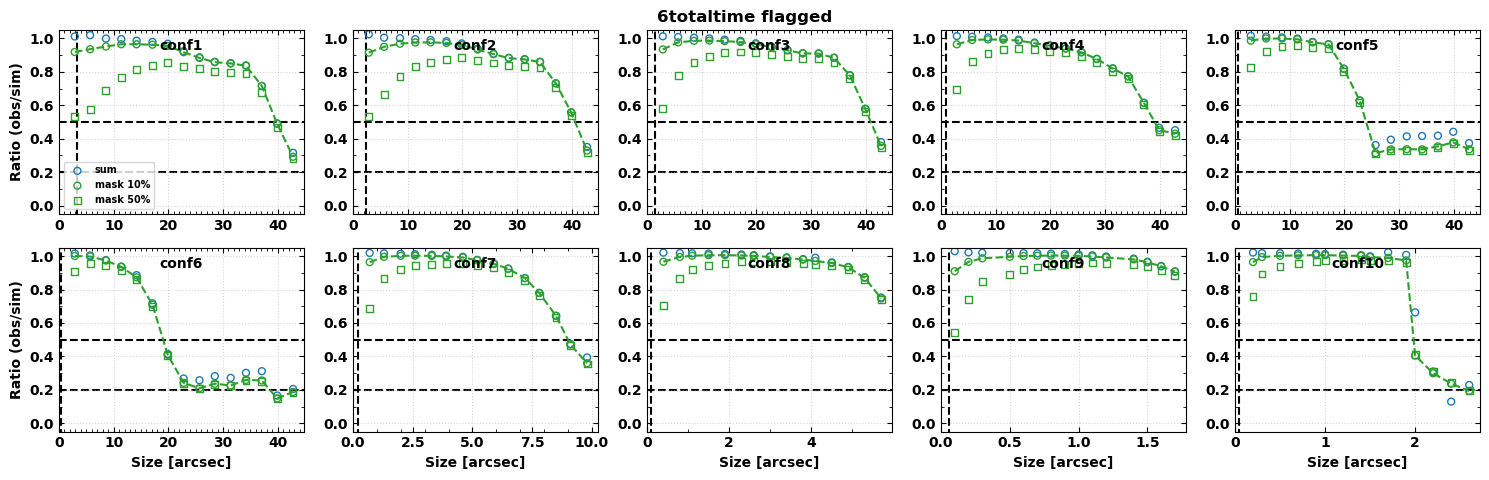

In [9]:
# Make scatter plot
fig1, ax1 = plt.subplots(2, 5, figsize=(15, 5))
ax1 = ax1.flatten()

colors = cm.turbo(np.linspace(0, 1, len(ax1)))

for i, conf in enumerate(conf_unique):

	conf_tab = table[np.where(table['conf']==conf)]
	conf_arr = conf_tab['conf']
	wide_arr = [''] * len(conf_arr)

	sum_sim = conf_tab['sum_sim'].value
	sum_obs = conf_tab['sum_obs'].value
	sum_fit_sim = conf_tab['sum_fit_sim'].value
	sum_fit_obs = conf_tab['sum_fit_obs'].value
	errl_fit_sim = conf_tab['errl_fit_sim'].value 
	errh_fit_sim = conf_tab['errh_fit_sim'].value 
	errl_fit_obs = conf_tab['errl_fit_obs'].value 
	errh_fit_obs = conf_tab['errh_fit_obs'].value
	sum_mask10_obs = conf_tab['sum_mask10_obs'].value
	sum_mask10_sim = conf_tab['sum_mask10_sim'].value 
	sum_mask50_obs = conf_tab['sum_mask50_obs'].value
	sum_mask50_sim = conf_tab['sum_mask50_sim'].value 
	ratio_arr = conf_tab['sum_obs'].value/conf_tab['sum_sim'].value 
	ratio_mask10_arr = conf_tab['sum_mask10_obs'].value/conf_tab['sum_mask10_sim'].value 
	ratio_mask50_arr = conf_tab['sum_mask50_obs'].value/conf_tab['sum_mask50_sim'].value 
	
	for j, wide in enumerate(conf_tab['wide']):
		wide_arr[j] = float(wide.replace('mrs0',''))
	wide_arr = np.array(wide_arr)

	ids = np.argsort(wide_arr)
	wide_arr = wide_arr[ids]
	ratio_arr = ratio_arr[ids]
	ratio_mask10_arr = ratio_mask10_arr[ids]
	ratio_mask50_arr = ratio_mask50_arr[ids]

	#rati_arr
	ax1[i].scatter(wide_arr, ratio_arr, s=25, ec='C0', fc='none', label='sum')
	ax1[i].scatter(wide_arr, ratio_mask10_arr, s=25, ec='C2', fc='none', marker = 'o', label='mask 10%')
	ax1[i].scatter(wide_arr, ratio_mask50_arr, s=25, ec='C2', fc='none', marker = 's', label='mask 50%')

	ax1[i].plot(wide_arr, ratio_mask10_arr, ls='--', c='C2')

	ax1[i].text(0.5, 0.95, conf, transform=ax1[i].transAxes, weight='extra bold', fontsize=10, va='top', ha='center')
	ax1[i].set_ylim([-0.05, 1.05])
	
	xlim = ax1[i].get_xlim()
	ax1[i].hlines(0.2, 0, xlim[1], colors='k', ls='--', zorder=0)
	ax1[i].hlines(0.5, 0, xlim[1], colors='k', ls='--', zorder=0)
	ax1[i].vlines(beam_size[i], -2, 2,  colors='k', ls='--', zorder=0)

	ax1[i].set_xlim([0, xlim[1]])

	ax1[i].xaxis.set_minor_locator(MultipleLocator(1))
	ax1[i].yaxis.set_minor_locator(MultipleLocator(0.1))
	ax1[i].grid(True, ls=':', alpha=0.5)

for i in [5,6,7,8,9]:
	ax1[i].set_xlabel('Size [arcsec]')

for i in [0,5]:
	ax1[i].set_ylabel('Ratio (obs/sim)')

ax1[0].legend(loc='lower left', fontsize=7)
	
fig1.suptitle(which_time.replace('_', ' ')[1:], fontweight='bold', y=0.95)

fig1.tight_layout()
# fig1.savefig(f'./../figs/scatter_ratio_{which}{which_time}.pdf', dpi=300, bbox_inches='tight', transparent=False)
fig1.savefig(f'./../figs/scatter_ratio_{which}{which_time}.png', dpi=300, bbox_inches='tight', transparent=False)

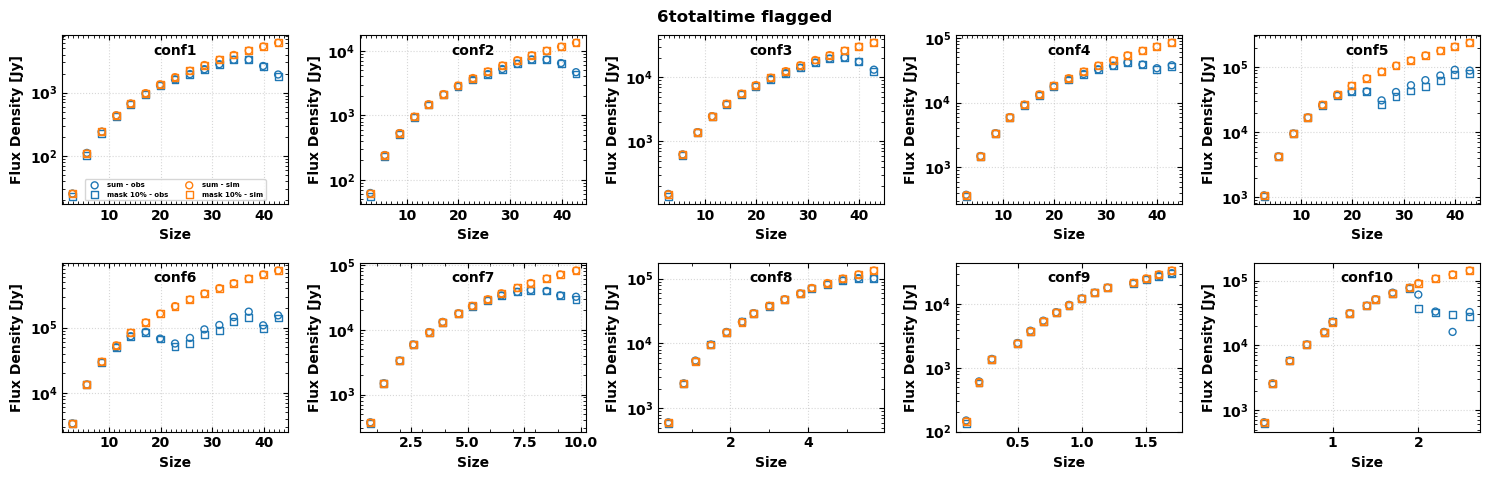

In [10]:
fig2, ax2 = plt.subplots(2, 5, figsize=(15, 5))
ax2 = ax2.flatten()

colors = cm.turbo(np.linspace(0, 1, len(ax2)))

for i, conf in enumerate(conf_unique):

	conf_tab = table[np.where(table['conf']==conf)]
	conf_arr = conf_tab['conf']
	wide_arr = [''] * len(conf_arr)

	sum_sim = conf_tab['sum_sim'].value
	sum_obs = conf_tab['sum_obs'].value
	sum_fit_sim = conf_tab['sum_fit_sim'].value
	sum_fit_obs = conf_tab['sum_fit_obs'].value
	sum_mask10_obs = conf_tab['sum_mask10_obs'].value
	sum_mask10_sim = conf_tab['sum_mask10_sim'].value 
	sum_mask50_obs = conf_tab['sum_mask50_obs'].value
	sum_mask50_sim = conf_tab['sum_mask50_sim'].value 
	ratio_mask10_arr = conf_tab['sum_mask10_obs'].value/conf_tab['sum_mask10_sim'].value 
	ratio_mask50_arr = conf_tab['sum_mask50_obs'].value/conf_tab['sum_mask50_sim'].value 
	ratio_arr = conf_tab['sum_obs'].value/conf_tab['sum_sim'].value 

	for j, wide in enumerate(conf_tab['wide']):
		wide_arr[j] = float(wide.replace('mrs0',''))

	wide_arr = np.array(wide_arr)

	#togeather
	ax2[i].scatter(wide_arr, sum_obs, s=25, ec='C0', fc='none', label='sum - obs')
	ax2[i].scatter(wide_arr, sum_mask10_obs, s=25, ec='C0', fc='none', marker = 's', label='mask 10% - obs')

	ax2[i].scatter(wide_arr, sum_sim, s=25, ec='C1', fc='none', label='sum - sim')
	ax2[i].scatter(wide_arr, sum_mask10_sim, s=25, ec='C1', fc='none', marker = 's', label='mask 10% - sim')

	ax2[i].set_xlabel('Size')
	ax2[i].set_ylabel('Flux Density [Jy]')

	ax2[i].text(0.5, 0.95, conf, transform=ax2[i].transAxes, weight='extra bold', fontsize=10, va='top', ha='center')

	ax2[i].set_yscale('log')

	ax2[i].grid(True, ls=':', alpha=0.5)

	ax2[i].xaxis.set_minor_locator(MultipleLocator(1))

for i in [5,6,7,8,9]:
	ax2[i].set_xlabel('Size')

for i in [0,5]:
	ax2[i].set_ylabel('Flux Density [Jy]')

ax2[0].legend(loc='lower center', fontsize=5, ncol=2)

fig2.suptitle(which_time.replace('_', ' ')[1:], fontweight='bold', y=0.95)

fig2.tight_layout()
# fig2.savefig(f'./../figs/scatter_{which}{which_time}.pdf', dpi=300, bbox_inches='tight', transparent=False)
# fig2.savefig(f'./../figs/scatter_{which}{which_time}.png', dpi=300, bbox_inches='tight', transparent=False)